In [1]:
# importing libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'di_QHGPuwEqXSsBeui56'

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = '/Users/daniel/Library/CloudStorage/OneDrive-Persönlich/00 Synology/01 Dokumente/2023 Docs/99 CareerFoundry/06 Advanced Analytics'

In [5]:
citi = pd.read_csv(os.path.join(path, '01 Data', 'citi_clean.csv'))

In [6]:
citi.shape

(43019, 18)

In [7]:
citi.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1
3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2
4,HbKJBz,14581,Fri,22,2013-09-27 22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27 22:08:08,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2


In [8]:
# Convert the "start_time" column to datetime type
citi['start_time'] = pd.to_datetime(citi['start_time'])

In [9]:
# Set the "start_time" column as the index
citi.set_index('start_time', inplace=True)

In [10]:
# Resample on daily basis and count the number of trips per day
trips_per_day = citi.resample('D').size()

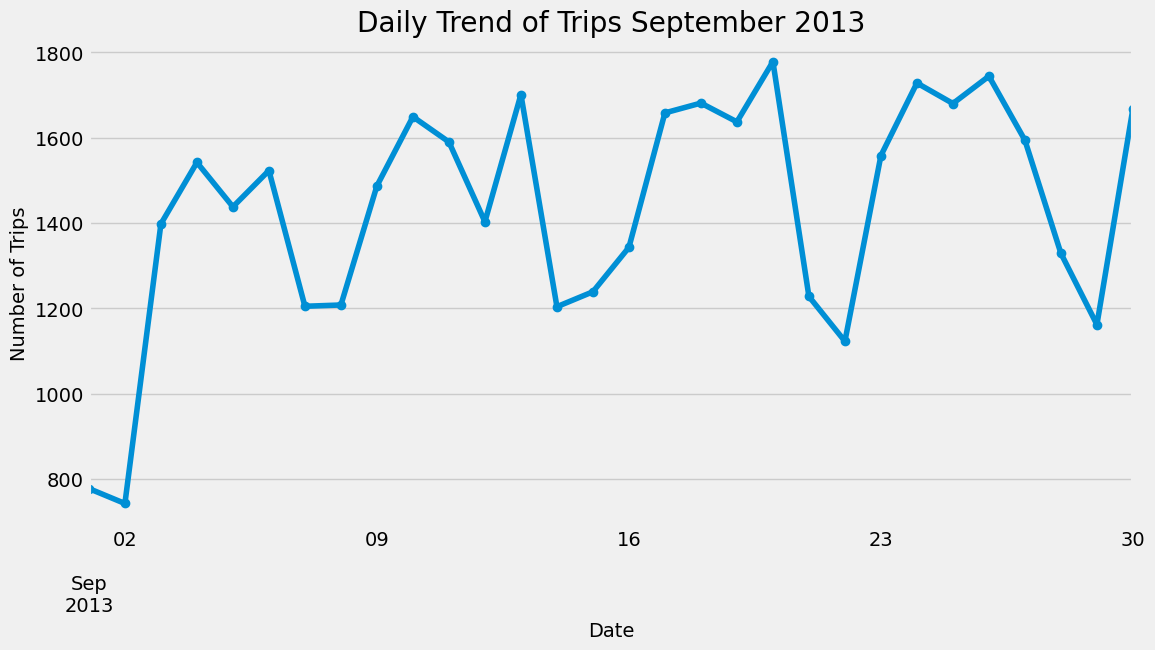

In [12]:
# Plot the count of trips per start_time on a daily level
plt.figure(figsize=(12, 6))
trips_per_day.plot(kind='line', marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Daily Trend of Trips September 2013')
plt.show()

In [13]:
citi.columns

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender'],
      dtype='object')

In [14]:
citi.shape

(43019, 17)

In [15]:
citi.head(2)

,trip_id,bike_id,weekday,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
start_time,,,,,,,,,,,,,,,,,
2013-09-09 18:18:55,LnQzQk,16013,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2
2013-09-12 18:38:53,IL9boN,15230,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1


In [16]:
trips_per_day.head(2)

start_time
2013-09-01    778
2013-09-02    743
Freq: D, dtype: int64

In [18]:
trips_per_day.shape

(30,)

In [19]:
#checking for missing values
trips_per_day.isnull().sum()

0

In [20]:
#checking for duplicates

dups = trips_per_day.duplicated()

In [21]:
dups.sum()

0

## Time-series analysis

In [23]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(trips_per_day, model='additive')

In [24]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

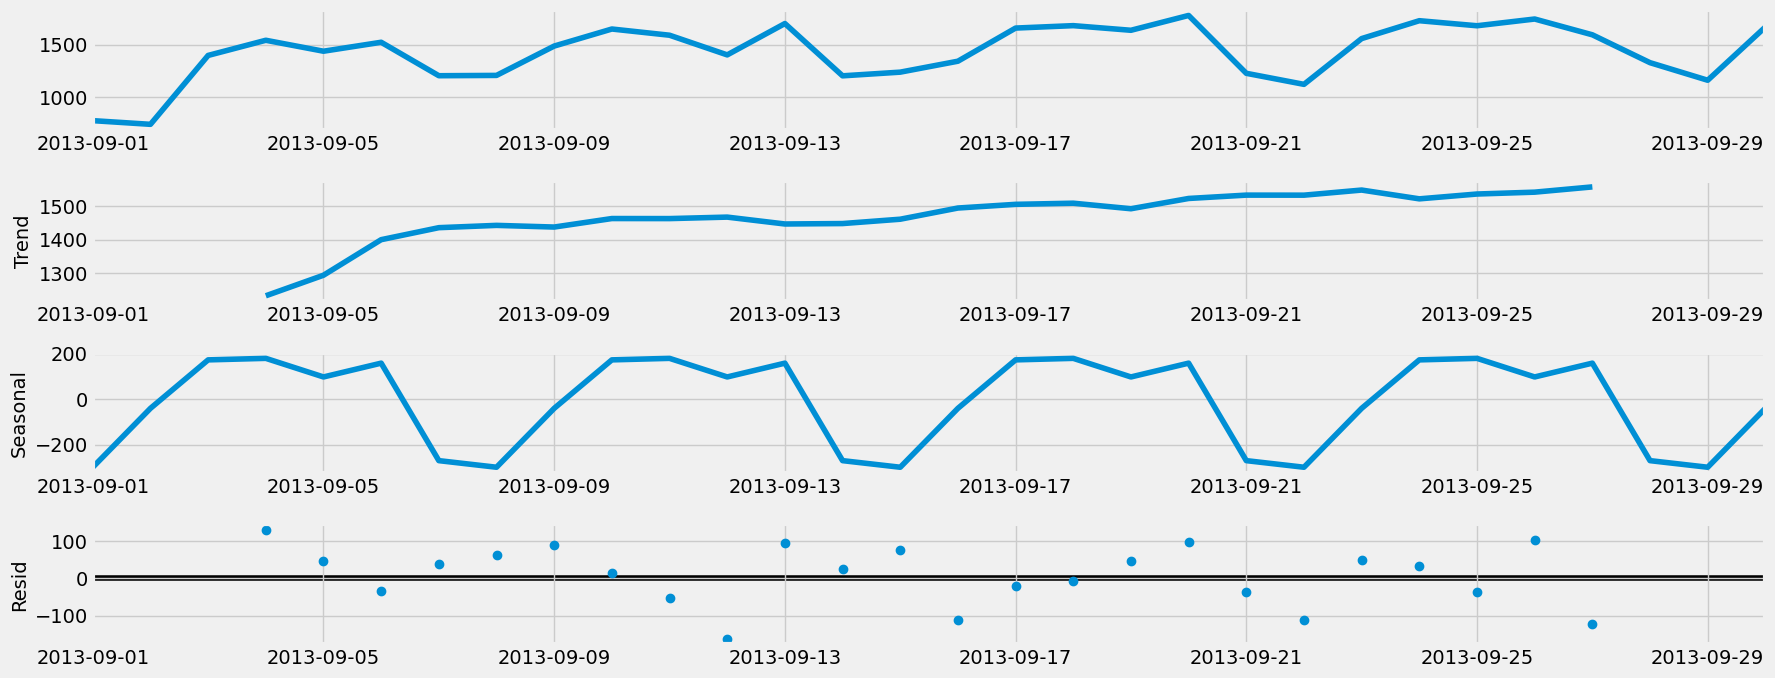

In [25]:
# Plot the separate components

decomposition.plot()
plt.show()

## Testing for stationarity

In [31]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(trips_per_day)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.655709
p-value                         0.004781
Number of Lags Used             6.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


Test Statistic: The test statistic value is -3.655709. It is more negative than the critical values at the 1%, 5%, and 10% significance levels, indicating strong evidence against the null hypothesis of non-stationarity. 

p-value: The p-value is 0.004781. It is less than the significance level of 0.05, providing evidence to reject the null hypothesis of non-stationarity.

Overall, there is strong evidence to suggest that the time series represented by the trips_per_day series is stationary. 

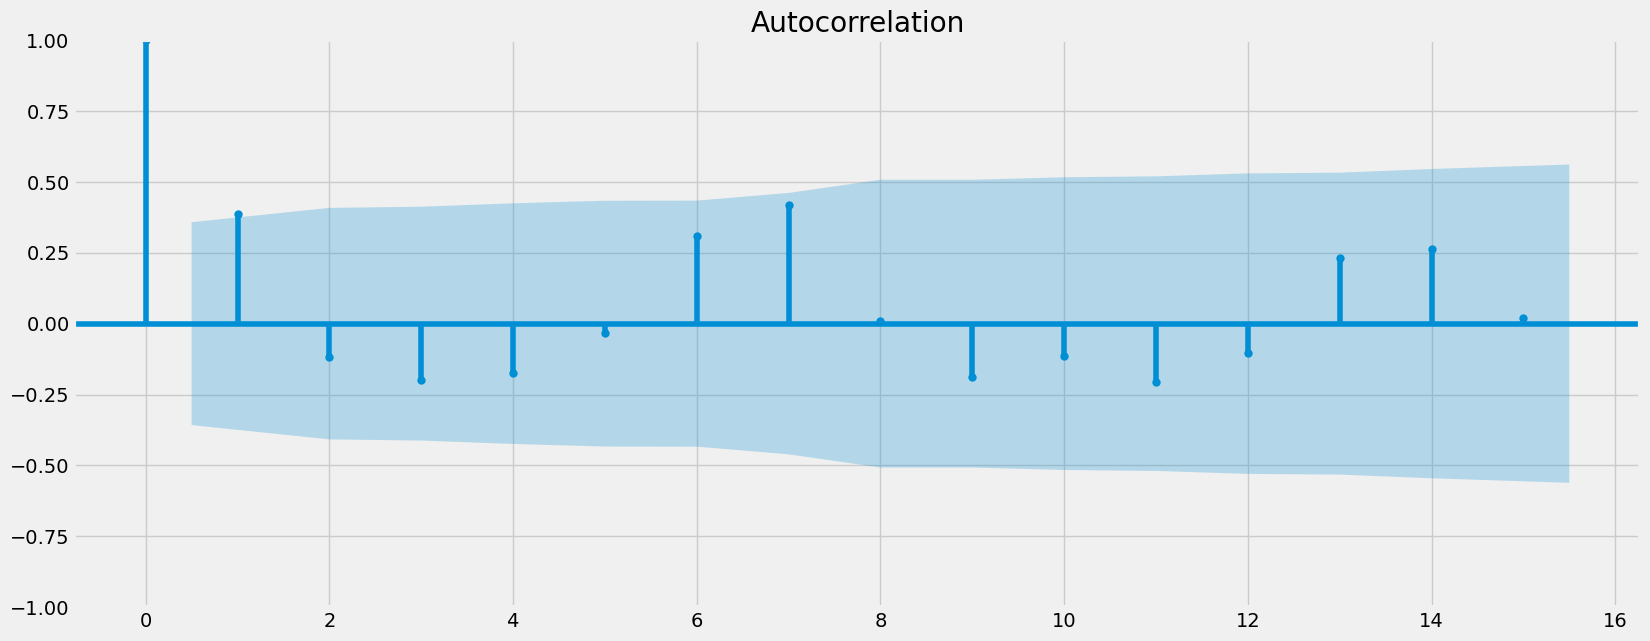

In [33]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(trips_per_day)
plt.show()

The majority of lags are above the confidence interval, so we do have man lags that significantly correlate with each other.

## Stationarizing

In [34]:
data_diff = trips_per_day - trips_per_day.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [35]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [36]:
data_diff.head()

start_time
2013-09-02    -35.0
2013-09-03    655.0
2013-09-04    144.0
2013-09-05   -104.0
2013-09-06     85.0
Freq: D, dtype: float64

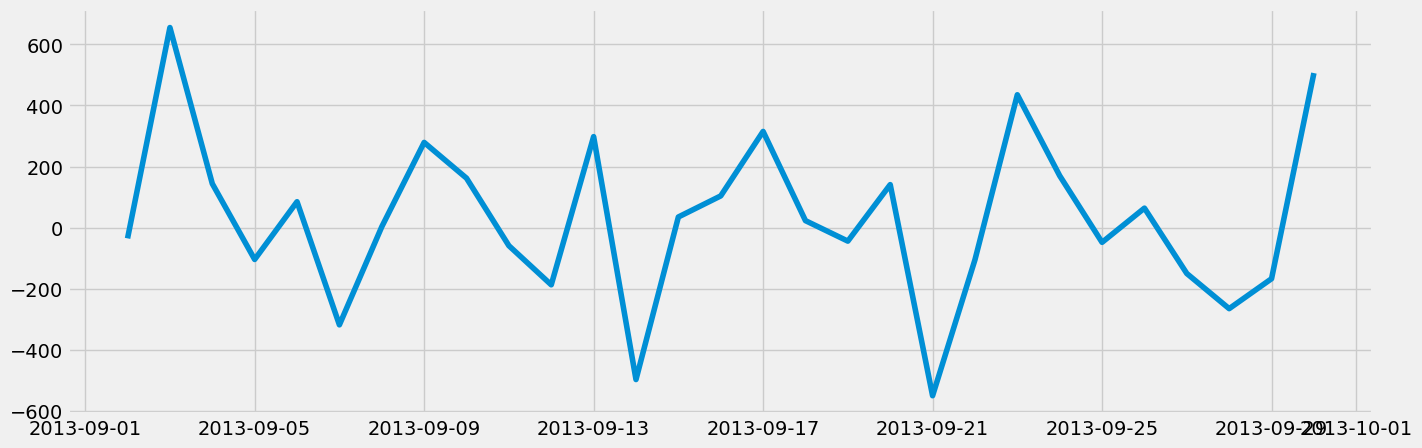

In [38]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [39]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.652711
p-value                         0.082585
Number of Lags Used             9.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


With the updated "stationarized" Trips_per_day series, the data represents non-stationarity and could indicate the presence of trends or seasonality in the data. Further analysis and additional tests may be required to confirm and understand the underlying patterns in the data. The original data showed more stationary data.

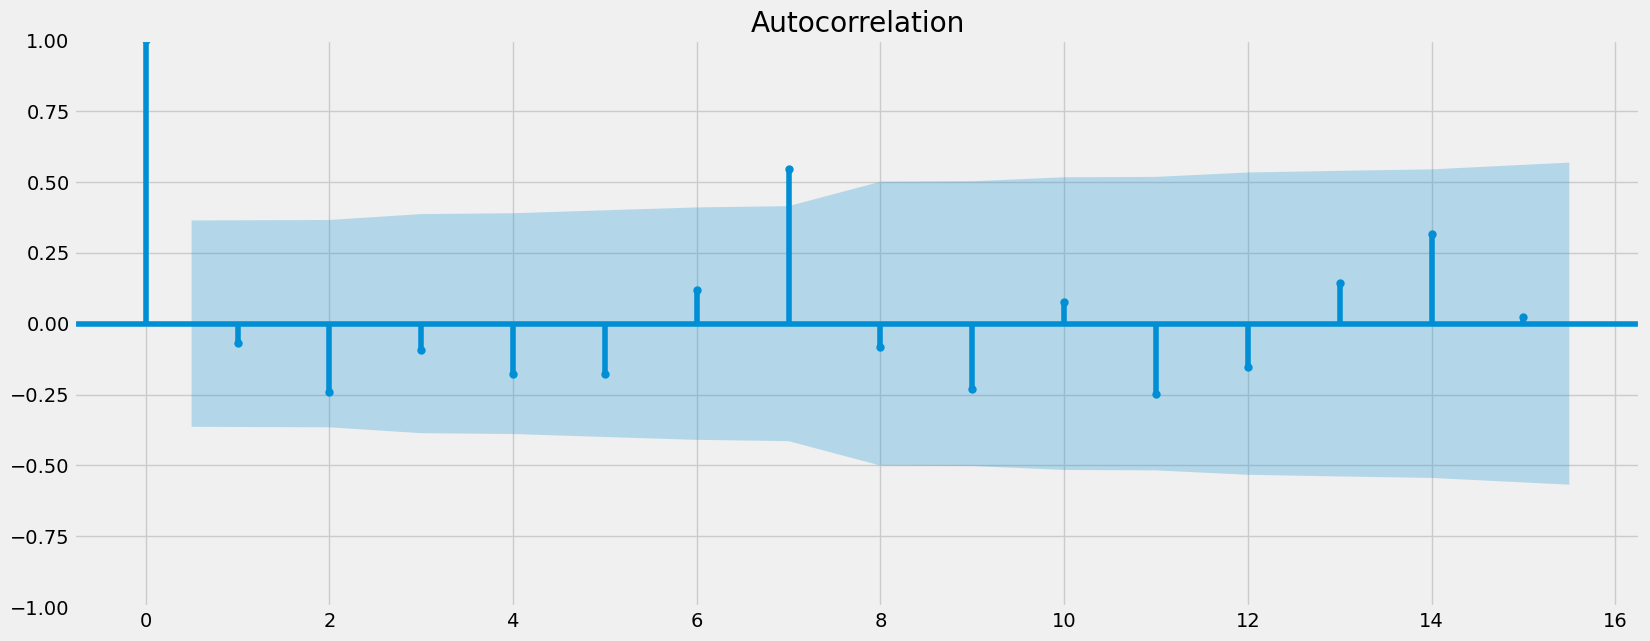

In [40]:
plot_acf(data_diff)
plt.show()

There is still a majority of lags above the confidence interval, suggesting strong auto-correlation between the lags. Further stationarizing methods would be needed.